In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
trainmeta = pd.read_csv("train-metadata.csv")
trainmeta.head()

/var/folders/x8/5yfhpjx53s5ftvf7_mgft9x80000gn/T/ipykernel_12920/1318733234.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  trainmeta = pd.read_csv("train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


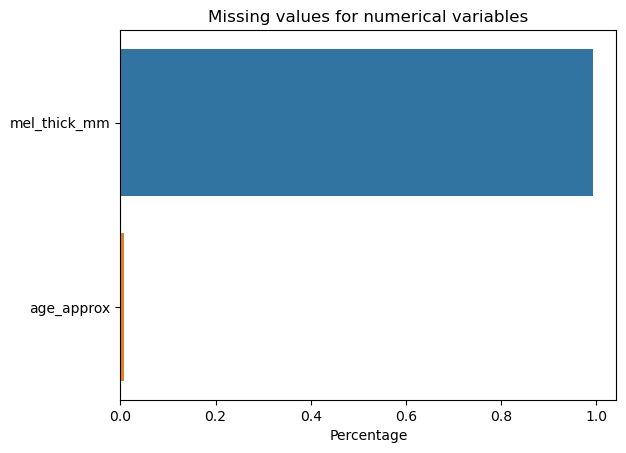

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

dfnum = trainmeta.select_dtypes(include=np.number)
missing = (dfnum.isna().sum() / dfnum.isna().sum().sum()).sort_values(ascending=False)
missing = missing[missing > 0]
sns.barplot(x=missing, y=missing.index)
plt.xlabel("Percentage")
plt.title("Missing values for numerical variables")
plt.show()

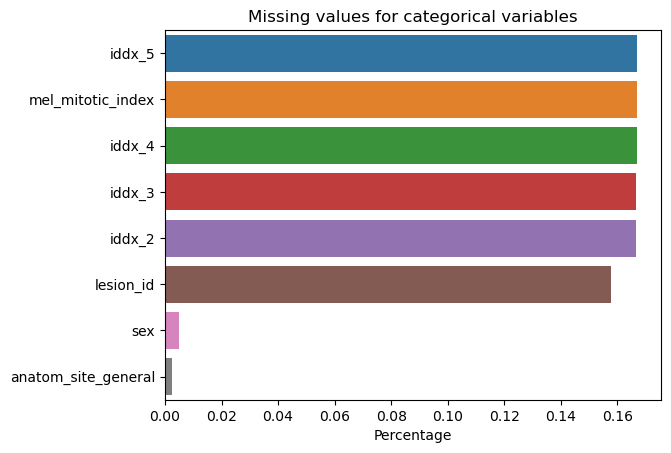

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

dfcat = trainmeta.select_dtypes(exclude=np.number)
missing = (dfcat.isna().sum() / dfcat.isna().sum().sum()).sort_values(ascending=False)
missing = missing[missing > 0]
sns.barplot(x=missing, y=missing.index)
plt.xlabel("Percentage")
plt.title("Missing values for categorical variables")
plt.show()

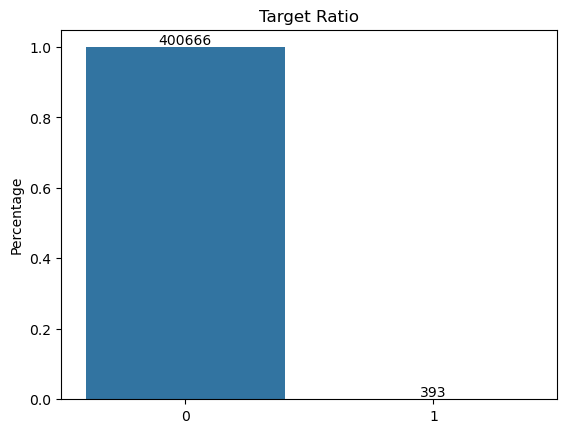

In [27]:
target_0, target_1 = dfnum["target"].value_counts().values
target_total = target_1 + target_0
target_0_rel, target_1_rel = target_0 / target_total, target_1 / target_total
# plot and add value to plot
sns.barplot(x=["0", "1"], y=[target_0_rel, target_1_rel])
plt.text(0, target_0_rel, f"{target_0}", ha="center", va="bottom")
plt.text(1, target_1_rel, f"{target_1}", ha="center", va="bottom")
plt.ylabel("Percentage")
plt.title("Target Ratio")
plt.show()

<Figure size 2000x1500 with 0 Axes>

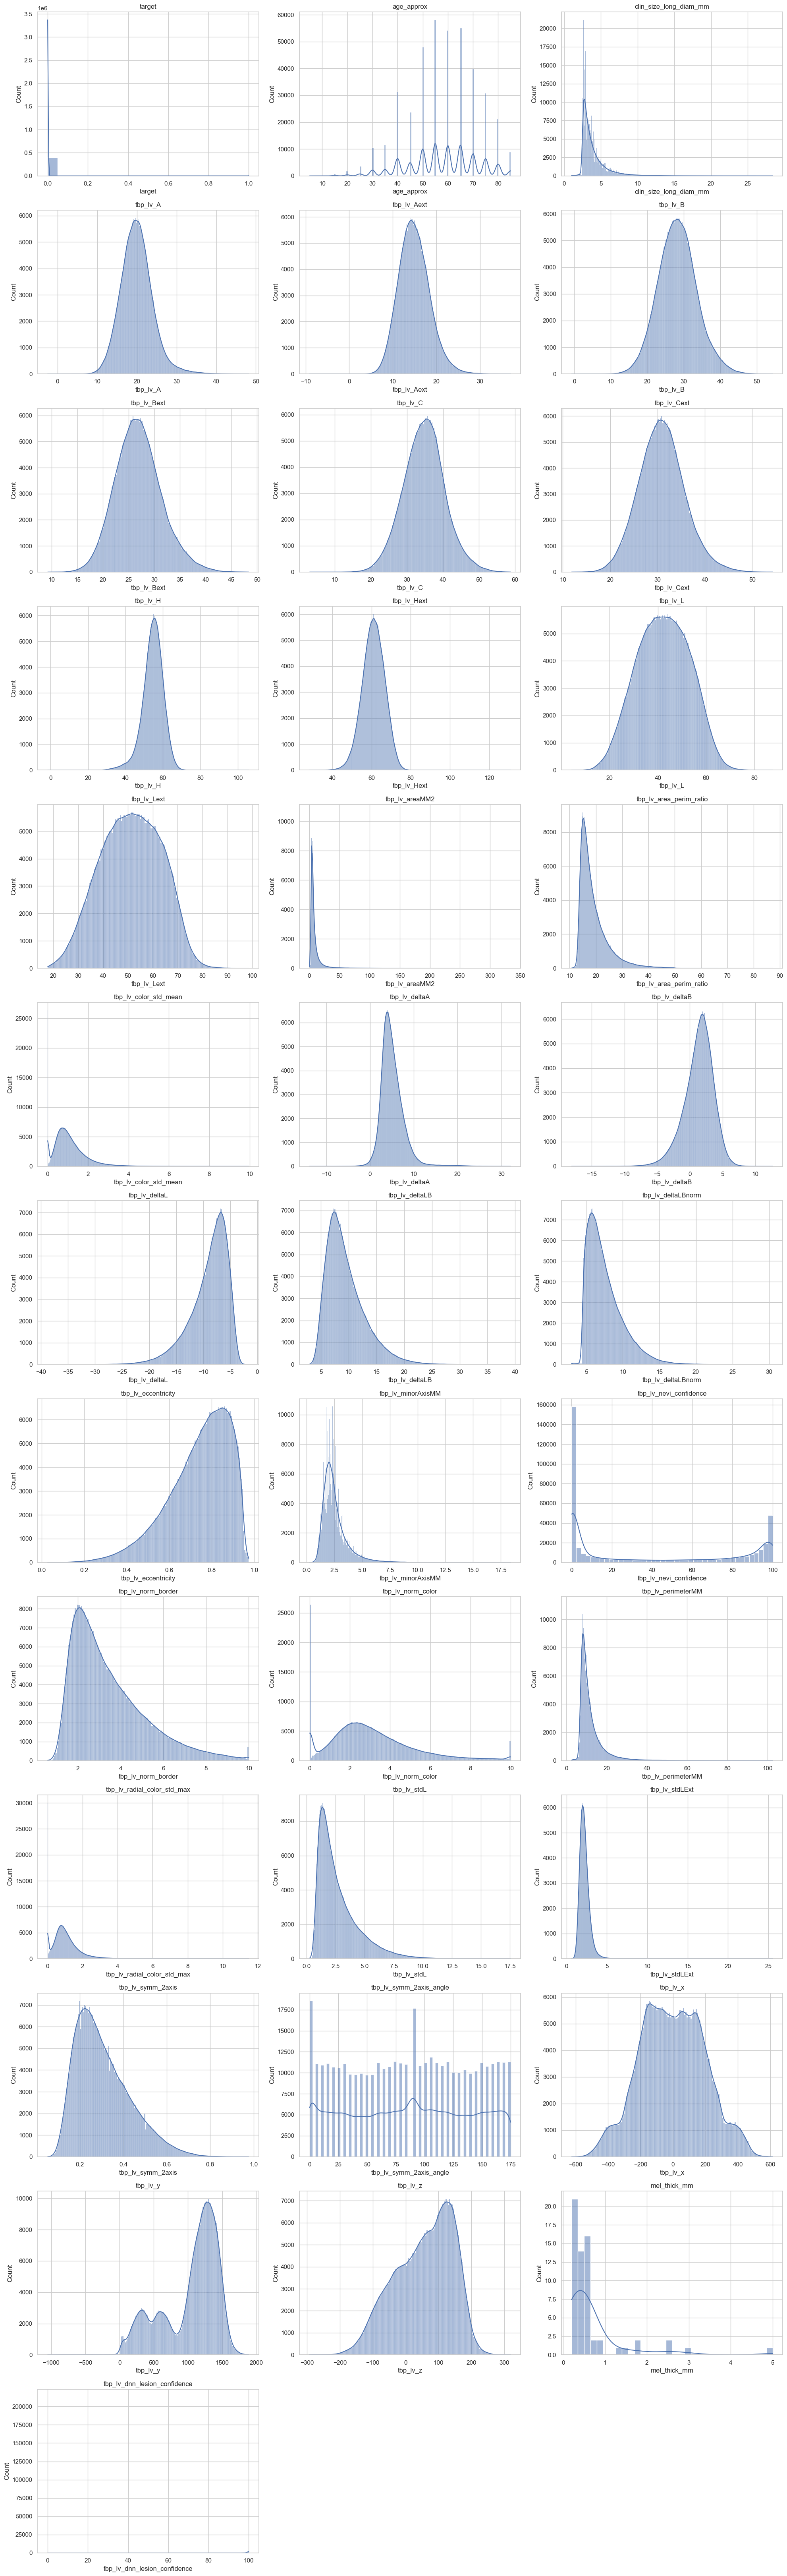

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

num_cols = len(dfnum.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(dfnum.columns):
    sns.histplot(dfnum[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()